In [3]:
pip install tensorflow

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler


In [5]:
data=pd.read_csv('agricultural_yield.csv')
data

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [6]:
X=data[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']]
y=data['Yield_kg_per_hectare'].values

In [7]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model=Sequential([
    Dense(units=64,activation='relu',input_dim=X_train.shape[1]),
    Dense(units=32,activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [10]:
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 338575.5000 - mae: 524.2137 - val_loss: 54678.1562 - val_mae: 185.4342
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52448.4922 - mae: 183.7111 - val_loss: 44116.3867 - val_mae: 166.4825
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41829.1523 - mae: 166.6161 - val_loss: 39663.6016 - val_mae: 158.4004
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40190.5898 - mae: 162.6288 - val_loss: 36313.1953 - val_mae: 151.4032
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37671.8359 - mae: 158.2605 - val_loss: 34296.0859 - val_mae: 148.4066
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34491.3906 - mae: 151.8356 - val_loss: 31572.1992 - val_mae: 142.1705
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32424.2598 - mae: 147.6305 - val_loss: 29952.1875 - val_mae: 139.0709
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31158.1777 - mae: 144.6261 - val_loss: 30817.

In [11]:
test_loss, test_mae=model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2928.4048 - mae: 43.3965 
Test Loss: 2706.530029296875, Test MAE: 41.31557083129883
Test Mean Absolute Error:  41.32


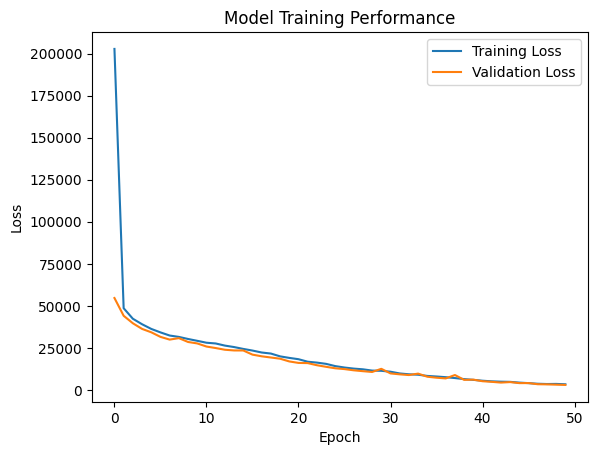

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance' )
plt.legend()
plt.show()

In [13]:
predictions = model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 473.07486],
       [ 641.0629 ],
       [1078.723  ],
       [ 653.6878 ],
       [ 794.8783 ],
       [ 991.2161 ],
       [ 334.91522],
       [ 628.60284],
       [ 477.9389 ],
       [ 800.52325],
       [ 581.87115],
       [ 673.6587 ],
       [ 617.3704 ],
       [ 733.48083],
       [ 845.5058 ],
       [ 672.39886],
       [ 948.04474],
       [ 496.49973],
       [ 613.36053],
       [ 390.15393],
       [ 796.654  ],
       [ 788.60406],
       [ 390.04297],
       [ 804.926  ],
       [1010.77625],
       [ 628.6009 ],
       [ 657.25494],
       [ 967.90875],
       [ 675.852  ],
       [ 625.76953],
       [ 680.3899 ],
       [ 804.8947 ],
       [ 823.13434],
       [ 837.3489 ],
       [ 499.27203],
       [ 704.49066],
       [ 711.5193 ],
       [1004.54156],
       [ 219.7833 ],
       [ 647.64655],
       [ 921.5479 ],
       [ 883.7564 ],
       [ 784.85785],
       [ 806.1139 ],
       [ 582.33246],
       [ 825.7885 ],
       [ 657.3753 ],
       [ 545.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<ipython-input-14-1856574021c3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-14-1856574021c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


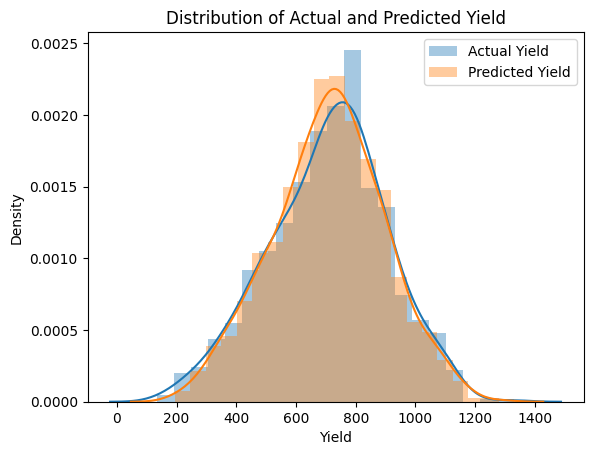

In [14]:
import seaborn as sns
y_pred=model.predict(X_test)
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

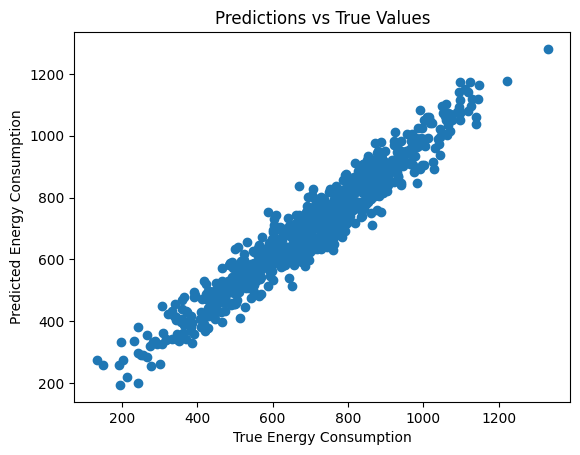

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()